# The Sparks Foundation

# Data Science and Business Analytics Intern

## Author: Anwesha Datta

# Task 4: Exploratory Data Analysis- Terrorism



## Data Source: https://bit.ly/2TK5Xn5

## Problem Statement 1: Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
## Problem Statement 2: As a security/defense analyst, try to find out the hot zone of terrorism.
## Problem Statement 3: What all security issues and insights you can derive by EDA?

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data import

df=pd.read_csv('Terrorism.csv',encoding='latin1')
df.head()

In [43]:
df.shape

(181691, 135)

### Column names 

In [44]:
for col in df.columns:
    print(col)

eventid
iyear
imonth
iday
approxdate
extended
resolution
country
country_txt
region
region_txt
provstate
city
latitude
longitude
specificity
vicinity
location
summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
attacktype1_txt
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
targtype1_txt
targsubtype1
targsubtype1_txt
corp1
target1
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
gname
gsubname
gname2
gsubname2
gname3
gsubname3
motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
weaptype1_txt
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weapt

### Renaming the columns for easy identification

In [45]:
df.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
for col in df.columns:
    print(col)

eventid
Year
Month
Day
approxdate
Extended
resolution
country
Country
region
Region
State
City
Latitude
Longitude
specificity
vicinity
location
Summary
crit1
crit2
crit3
doubtterr
alternative
alternative_txt
multiple
success
suicide
attacktype1
AttackType
attacktype2
attacktype2_txt
attacktype3
attacktype3_txt
targtype1
Target_type
targsubtype1
targsubtype1_txt
corp1
Target
natlty1
natlty1_txt
targtype2
targtype2_txt
targsubtype2
targsubtype2_txt
corp2
target2
natlty2
natlty2_txt
targtype3
targtype3_txt
targsubtype3
targsubtype3_txt
corp3
target3
natlty3
natlty3_txt
Group
gsubname
gname2
gsubname2
gname3
gsubname3
Motive
guncertain1
guncertain2
guncertain3
individual
nperps
nperpcap
claimed
claimmode
claimmode_txt
claim2
claimmode2
claimmode2_txt
claim3
claimmode3
claimmode3_txt
compclaim
weaptype1
Weapon_type
weapsubtype1
weapsubtype1_txt
weaptype2
weaptype2_txt
weapsubtype2
weapsubtype2_txt
weaptype3
weaptype3_txt
weapsubtype3
weapsubtype3_txt
weaptype4
weaptype4_txt
weapsubtype4
wea

### Keeping only the necessary columns

In [46]:
df= df[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
df.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [47]:
df.shape

(181691, 19)

In [48]:
df.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [49]:
df.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

### Top 10 affected countries

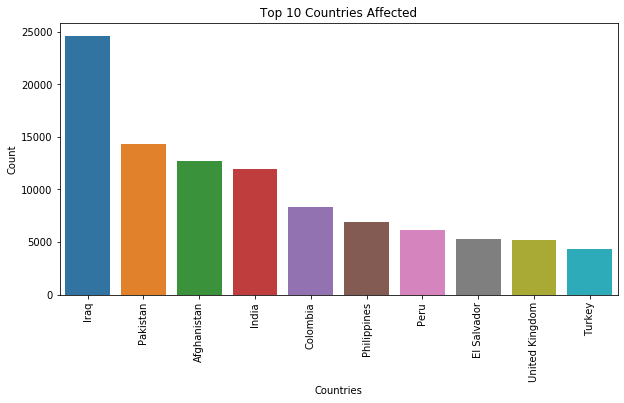

In [50]:
plt.figure(figsize = (10,5))
sns.barplot(df['Country'].value_counts()[:10].index,df['Country'].value_counts()[:10].values)
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [51]:
df1=df[df['Country']=='Iraq']
df1.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
2854,1975,3,0,1,Iraq,Nineveh,Middle East & North Africa,Mosul,36.354145,43.143570,Hijacking,0.0,1.0,B-737,NaN,Unknown,Airports & Aircraft,Unknown,NaN
4385,1976,12,0,15,Iraq,Baghdad,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,10.0,285.0,Airport terminal,NaN,Unknown,Airports & Aircraft,Explosives,NaN
4393,1976,12,1,18,Iraq,Unknown,Middle East & North Africa,Penjwon,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,agricultural experts in NE Iraq,NaN,Kurdish Democratic Party-Iraq (KDP),Government (General),Unknown,NaN
4402,1976,12,0,24,Iraq,Baghdad,Middle East & North Africa,Baghdad,33.303566,44.371773,Assassination,2.0,0.0,Personnel,NaN,Unknown,Violent Political Party,Firearms,NaN
8688,1979,6,0,15,Iraq,Basra,Middle East & North Africa,Basra,30.510054,47.778095,Assassination,1.0,0.0,local secretary,NaN,Unknown,Government (General),Unknown,NaN


### States affected in Iraq

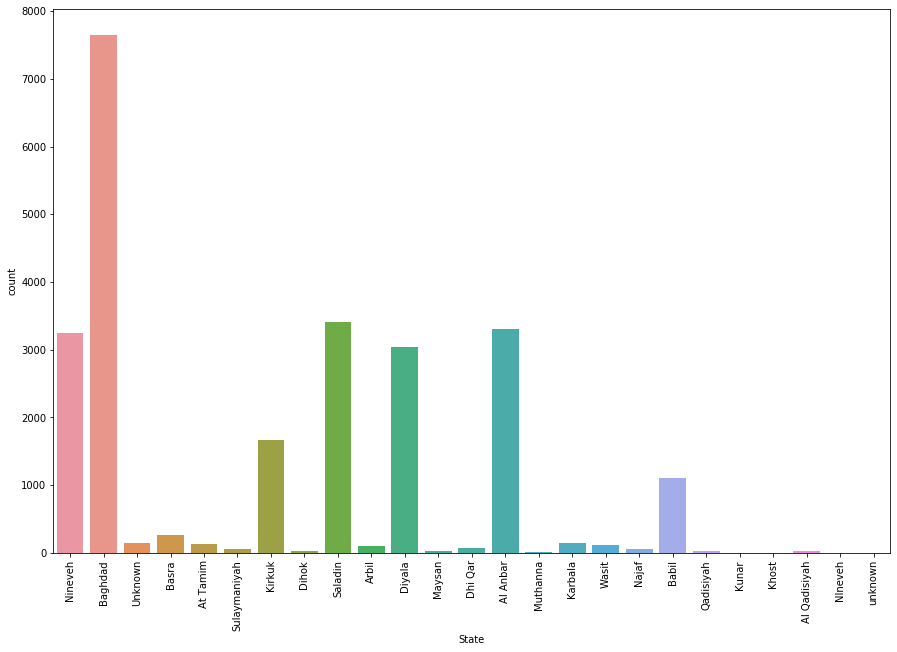

In [52]:
plt.figure(figsize=(15,10))
sns.countplot(df1['State'])
plt.xticks(rotation=90)
plt.show()

###### Baghdad in Iraq is most affected

### Maximum people killed in Baghdad

In [53]:
df[df['State']=='Baghdad'].Killed.max()


383.0

### Top 10 affected states

In [54]:
df.State.value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

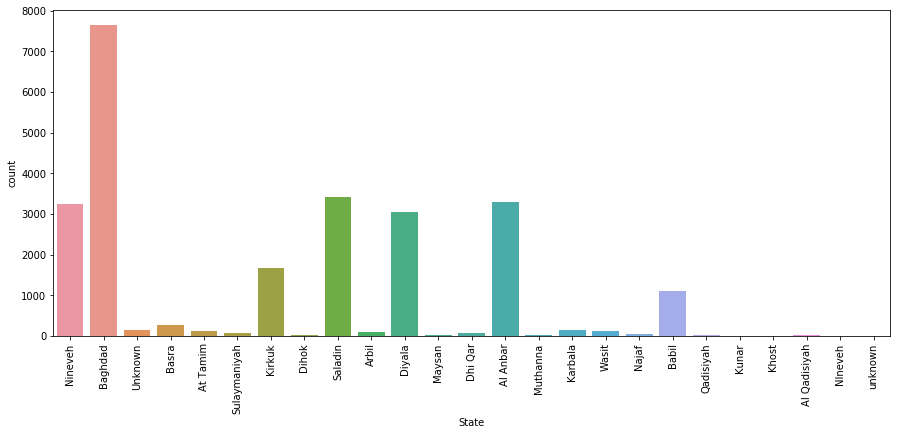

In [55]:
plt.figure(figsize=(15,6))
sns.countplot(df1['State'])
plt.xticks(rotation=90)
plt.show()

### Region wise casualities 

In [56]:
df['Casualities']=df.Killed + df.Wounded
region_wise=df[['Region','Killed','Wounded','Casualities']].copy()
region_wise=region_wise.groupby(by=['Region']).sum()
region_wise.sort_values('Killed',ascending=False)

,Killed,Wounded,Casualities
Region,,,
Middle East & North Africa,137642.0,214308.0,329807.0
South Asia,101319.0,141360.0,234366.0
Sub-Saharan Africa,78386.0,52857.0,108990.0
South America,28849.0,16704.0,43562.0
Central America & Caribbean,28708.0,8991.0,34530.0
Southeast Asia,15637.0,26259.0,40841.0
Eastern Europe,7415.0,12045.0,18239.0
Western Europe,6694.0,18332.0,22778.0
North America,4916.0,21531.0,26398.0


### Region wise affected

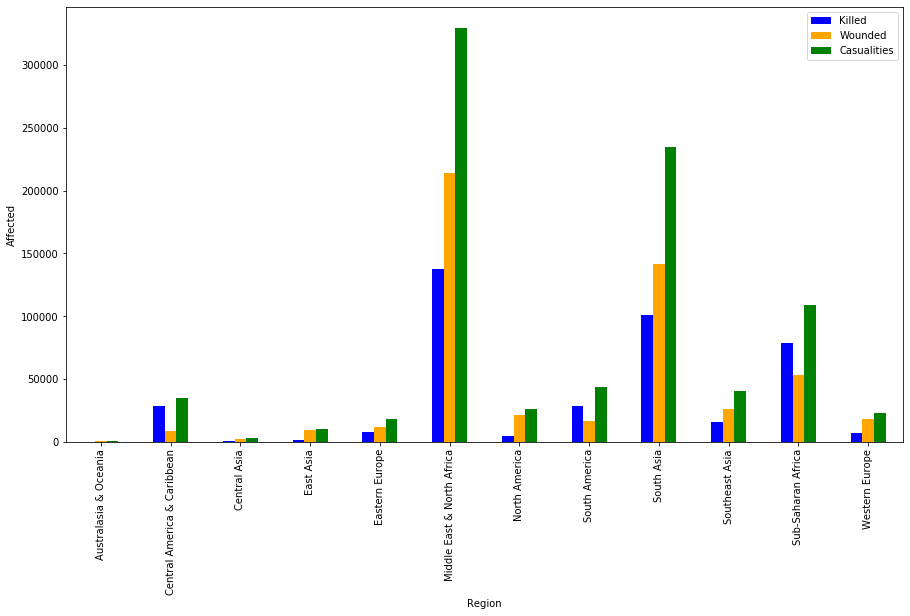

In [57]:
region_wise= region_wise.groupby('Region')[['Killed','Wounded','Casualities']].sum().sort_values(by='Region')
region_wise[:].plot.bar(color=['blue','orange','green'],figsize=(15,8))
plt.xlabel('Region')
plt.ylabel('Affected')
plt.show()

###### The middle east and north Africa is highly affected. Proper protection should be installed in this region immediately.

### Number of attacks each year 

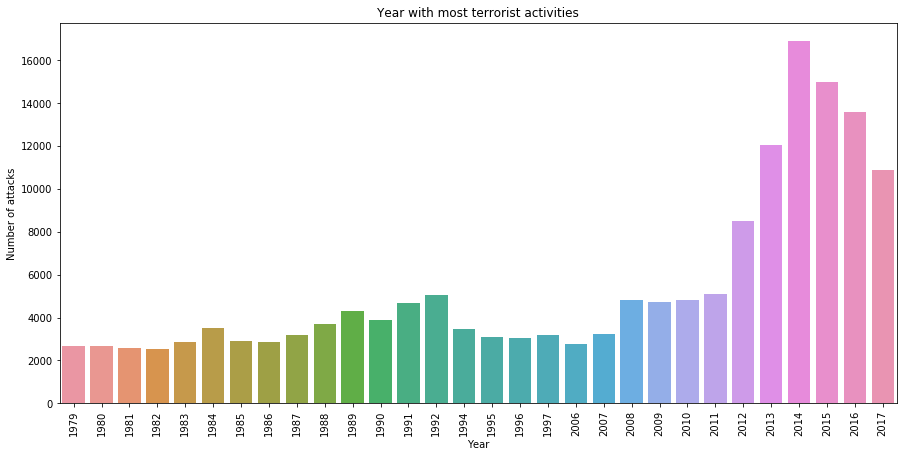

In [58]:
plt.figure(figsize = (15,7))
sns.barplot(df.Year.value_counts()[:30].index,df.Year.value_counts()[:30].values)
plt.title('Year with most terrorist activities')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 90)
plt.show()

###### From 2013 there is an increase in terrorist attacks 

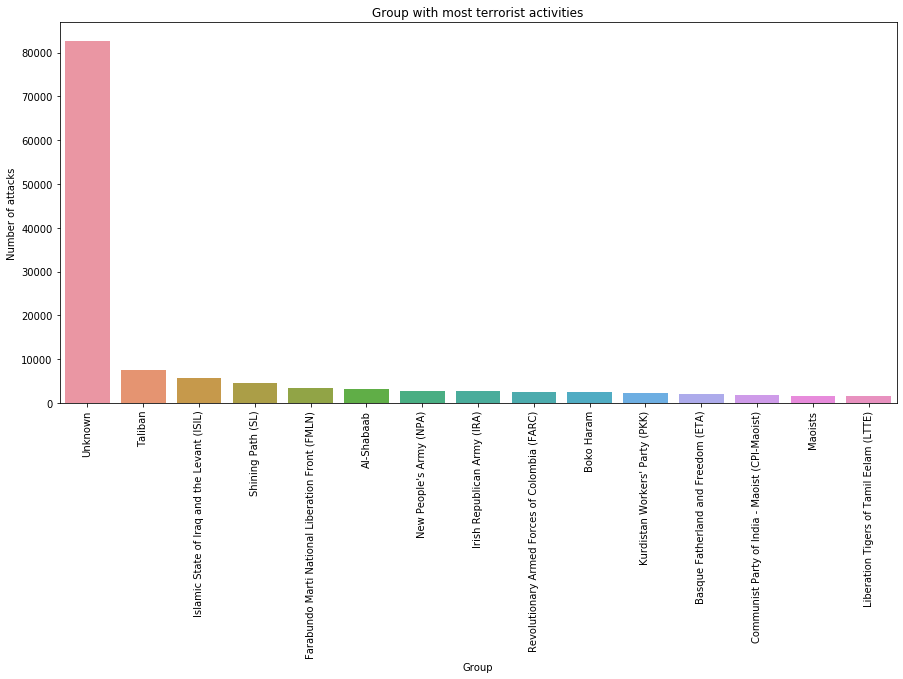

In [59]:
plt.figure(figsize = (15,7))
sns.barplot(df['Group'].value_counts()[:15].index,df['Group'].value_counts()[:15].values)
plt.title('Group with most terrorist activities')
plt.xlabel('Group')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 90)
plt.show()

###### An unknown group is attacking at a huge rate. Hence immediate findings should be started for that unknown group to be discovered. Apart from the unknown group, Taliban has a huge attack rate. Proper protection should be taken hence against the Taliban group

### Attack Types

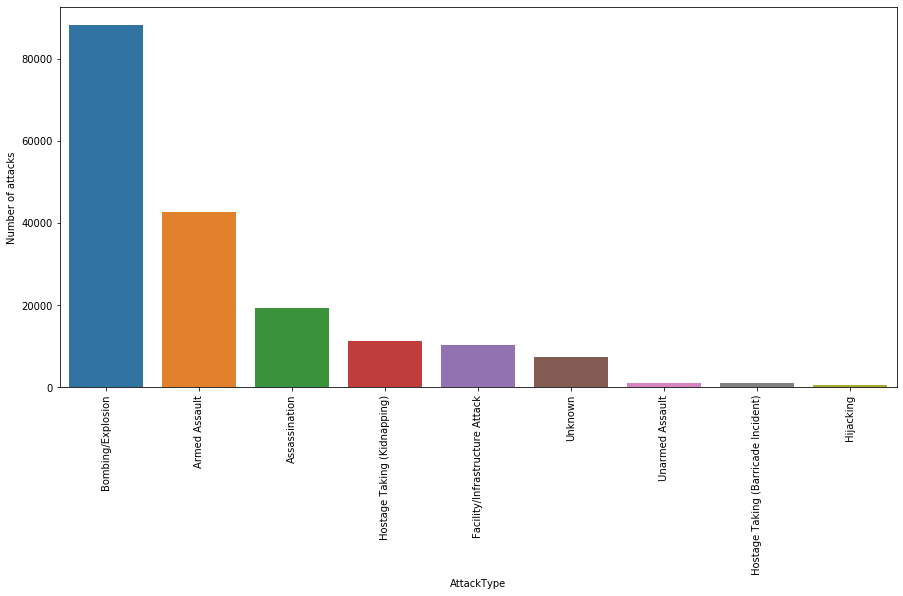

In [60]:
plt.figure(figsize = (15,7))
sns.barplot(df.AttackType.value_counts()[:30].index,df.AttackType.value_counts()[:30].values)
#plt.title('Year with most terrorist activities')
plt.xlabel('AttackType')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 90)
plt.show()

###### Bombing or Explosion is the most frequent method of attack used. Hence, proper measurements should be taken to ensure safety against these. 

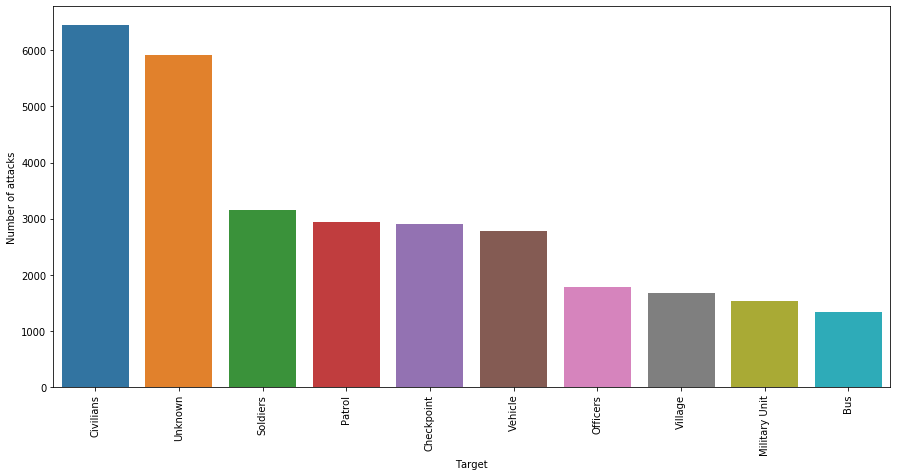

In [61]:
plt.figure(figsize = (15,7))
sns.barplot(df.Target.value_counts()[:10].index,df.Target.value_counts()[:10].values)
plt.xlabel('Target')
plt.ylabel('Number of attacks')
plt.xticks(rotation = 90)
plt.show()

###### The citizens are the top target in the terrorist attacks. Proper safety should be ensured to them. 

## Conclusions:

1. Iraq has the highest rate of terrorist attacks.
2. The state Baghdad in Iraq is a hot zone for terrorism with a maximum death record of 383.
3. The middle east and north Africe has a high casualties rates. 
4. The terrorists attack mostly by bombing/explosion. Proper measurements should be installed against bombing.
5. The citizines are the top targets of the terrorists.
6. A huge number of unknown group is attacking. Immediate findings should be started for that group. 
